# Part One: Importing and Cleaning Data


In [34]:
import pandas as pd

society_data = pd.read_csv("C:/Users/Cortland/Downloads/Crimes_Against_Society.csv")
property_data = pd.read_csv("C:/Users/Cortland/Downloads/Crimes_Against_Property.csv")
Persons_data = pd.read_csv("C:/Users/Cortland/Downloads/Crimes_Against_Persons.csv")

society_data.head(10)


,Crimes Against Society Offenses,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,Offense Category,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"by State, 2020",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,Total\nOffenses,Offense Category,NaN,NaN,NaN,NaN,NaN
4,State,Number of\nParticipating\nAgencies,Population\nCovered,NaN,Animal\nCruelty,Drug/\nNarcotic\nOffenses,Gambling\nOffenses,Pornography/\nObscene\nMaterial,Prostitution\nOffenses,Weapon\nLaw\nViolations
5,Total,"9,880","177,522,400","1,273,179","11,566","1,039,388","1,444","25,268","7,364","188,149"
6,Alabama,131,"715,130","3,235",43,"2,903",1,11,0,277
7,Arizona,22,"1,769,207","18,239",182,"16,530",0,232,39,"1,256"
8,Arkansas,281,"2,818,360","35,720",11,"31,860",17,390,48,"3,394"
9,Colorado,225,"5,754,151","31,282",759,"22,217",5,874,224,"7,203"


now that we know that the data looks like, we are doing to do some reforming to make it more readable.

In [35]:
##removing the first five rows of each df that contains information/headers we do not need. We also, want to reset the
##index to make sure we get the proper index for later in the cleaning/analysis
society_data = society_data.iloc[5:].reset_index(drop=True)
property_data = property_data.iloc[5:].reset_index(drop=True)
Persons_data = Persons_data.iloc[5:].reset_index(drop=True)

##Dropping the last row since we know it contains char's
society_data = society_data.drop(society_data.index[-1])
property_data = property_data.drop(property_data.index[-1])
Persons_data = Persons_data.drop(Persons_data.index[-1])

society_data.head(10)

,Crimes Against Society Offenses,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,Total,"9,880","177,522,400","1,273,179","11,566","1,039,388","1,444","25,268","7,364","188,149"
1,Alabama,131,"715,130","3,235",43,"2,903",1,11,0,277
2,Arizona,22,"1,769,207","18,239",182,"16,530",0,232,39,"1,256"
3,Arkansas,281,"2,818,360","35,720",11,"31,860",17,390,48,"3,394"
4,Colorado,225,"5,754,151","31,282",759,"22,217",5,874,224,"7,203"
5,Connecticut,105,"3,488,526","10,780",85,"8,060",16,208,39,"2,372"
6,Delaware,62,"986,809","12,934","1,154","9,431",31,104,41,"2,173"
7,District of Columbia1,1,NaN,408,1,330,0,0,0,77
8,Georgia,401,"7,938,166","39,015",885,"32,004",32,"1,153",246,"4,695"
9,Hawaii,1,"966,438","3,280",46,"2,400",313,60,40,421


Now we have to rename the columns to match what we want to look for...Since we know the original name of the columns from the excel file, we are going to add them to the data frame. 

In [36]:
new_column_names = {
    'Crimes Against Society Offenses': 'State',
    'Unnamed: 1': 'Number of Participating Agencies',
    'Unnamed: 2': 'Population Covered',
    'Unnamed: 3': 'Total Offenses',
    'Unnamed: 4': 'Animal Cruelty',
    'Unnamed: 5': 'Drug/ Narcotic Offenses',
    'Unnamed: 6': 'Gambling Offenses',
    'Unnamed: 7': 'Pornography/Obscene Material',
    'Unnamed: 8': 'Prostitution Offenses',
    'Unnamed: 9': 'Weapon Law Violations'
}

society_data = society_data.rename(columns=new_column_names)
property_data = property_data.rename(columns=new_column_names)
Persons_data = Persons_data.rename(columns=new_column_names)

property_data.head(10)


,Crimes Against Property Offenses,Number of Participating Agencies,Population Covered,Total Offenses,Animal Cruelty,Drug/ Narcotic Offenses,Gambling Offenses,Pornography/Obscene Material,Prostitution Offenses,Weapon Law Violations,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15
0,Total,"9,880","177,522,400","5,371,269","21,829",622,"522,400","102,486","1,016,618","19,819","9,141","643,405","2,453,071","406,911","102,659","72,308"
1,Alabama,131,"715,130","7,981",34,0,910,186,"1,375",40,13,820,"3,840",541,66,156
2,Arizona,22,"1,769,207","47,284",186,1,"4,404",567,"8,390",147,113,"6,778","23,063","2,611",720,304
3,Arkansas,281,"2,818,360","135,509",556,1,"14,994","3,868","26,063",77,47,"23,636","54,991","7,355","1,440","2,481"
4,Colorado,225,"5,754,151","257,623","1,329",156,"22,539","3,910","48,987",313,751,"29,769","112,828","30,179","3,958","2,904"
5,Connecticut,105,"3,488,526","78,197",159,3,"5,897","1,356","14,435",214,164,"8,575","37,125","7,295","1,695","1,279"
6,Delaware,62,"986,809","37,244",138,1,"2,572",427,"9,085",150,74,"6,090","15,849","1,597",705,556
7,District of Columbia1,1,NaN,"1,065",2,0,1,4,428,0,0,9,412,29,165,15
8,Georgia,401,"7,938,166","207,820",651,12,"18,567","5,526","36,394",312,251,"27,491","97,267","14,621","3,862","2,866"
9,Hawaii,1,"966,438","32,730",319,2,"3,301",417,949,32,134,"4,091","18,238","3,744",743,760


From our head above, we can see some states are reporting in a population of 0, we know that is not true as every state has atleast one person. So we will drop states with NA-values. 

In [37]:
society_data = society_data.dropna(subset=['Population Covered'])
property_data = property_data.dropna(subset=['Population Covered'])
Persons_data = Persons_data.dropna(subset=['Population Covered'])


society_data.head(10)

,State,Number of Participating Agencies,Population Covered,Total Offenses,Animal Cruelty,Drug/ Narcotic Offenses,Gambling Offenses,Pornography/Obscene Material,Prostitution Offenses,Weapon Law Violations
0,Total,"9,880","177,522,400","1,273,179","11,566","1,039,388","1,444","25,268","7,364","188,149"
1,Alabama,131,"715,130","3,235",43,"2,903",1,11,0,277
2,Arizona,22,"1,769,207","18,239",182,"16,530",0,232,39,"1,256"
3,Arkansas,281,"2,818,360","35,720",11,"31,860",17,390,48,"3,394"
4,Colorado,225,"5,754,151","31,282",759,"22,217",5,874,224,"7,203"
5,Connecticut,105,"3,488,526","10,780",85,"8,060",16,208,39,"2,372"
6,Delaware,62,"986,809","12,934","1,154","9,431",31,104,41,"2,173"
8,Georgia,401,"7,938,166","39,015",885,"32,004",32,"1,153",246,"4,695"
9,Hawaii,1,"966,438","3,280",46,"2,400",313,60,40,421
10,Idaho,107,"1,819,575","23,704",52,"22,434",0,288,33,897


# Part two: Data exploration

Let's see the total number of offences based off the three dataframes

In [38]:
print(society_data.groupby('State')['Total Offenses'].sum())
#print(property_data.groupby('State')['Total Offenses'].sum())
#print(Persons_data.groupby('State')['Total Offenses'].sum())



State
Alabama               3,235
Arizona              18,239
Arkansas             35,720
Colorado             31,282
Connecticut          10,780
Delaware             12,934
Georgia              39,015
Hawaii                3,280
Idaho                23,704
Illinois              1,135
Indiana              36,414
Iowa                 24,306
Kansas               30,538
Kentucky             44,912
Louisiana            14,814
Maine                 3,170
Maryland              4,136
Massachusetts        13,306
Michigan             42,974
Minnesota            22,778
Mississippi          13,881
Missouri             46,084
Montana               7,558
Nebraska              8,633
Nevada               11,716
New Hampshire         7,604
New Mexico            7,893
New York              3,124
North Carolina      100,119
North Dakota         12,993
Ohio                 61,965
Oklahoma             19,795
Oregon               22,389
Pennsylvania            267
Rhode Island          3,557
South Carolina

Find the state with the highest number of offenses:

In [39]:
##For Society Data
society_data['Total Offenses'] = pd.to_numeric(society_data['Total Offenses'], errors='coerce')
print(society_data.groupby('State')['Total Offenses'].sum().idxmax())

##For persons Data
society_data['Total Offenses'] = pd.to_numeric(society_data['Total Offenses'], errors='coerce')
print(society_data.groupby('State')['Total Offenses'].sum().idxmax())

##property Data
society_data['Total Offenses'] = pd.to_numeric(society_data['Total Offenses'], errors='coerce')
print(society_data.groupby('State')['Total Offenses'].sum().idxmax())

Wyoming
Wyoming
Wyoming


# Part Three: Data Visualization

A bar chart of the top 10 states with the highest number of offenses:

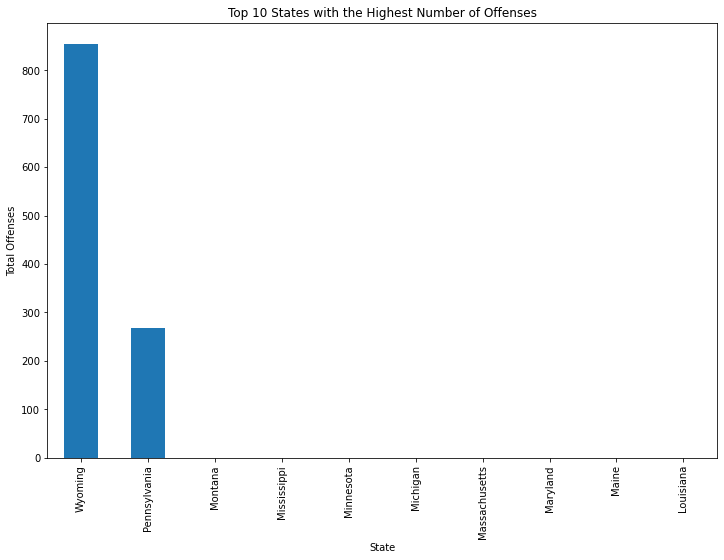

In [40]:
import matplotlib.pyplot as plt

top10_states = society_data.groupby('State')['Total Offenses'].sum().sort_values(ascending=False).head(10)
top10_states.plot(kind='bar')
plt.xlabel('State')
plt.ylabel('Total Offenses')
plt.title('Top 10 States with the Highest Number of Offenses')
plt.show()


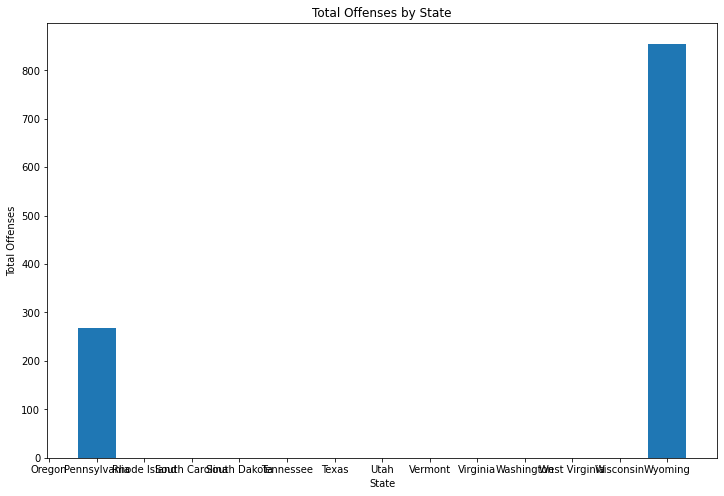

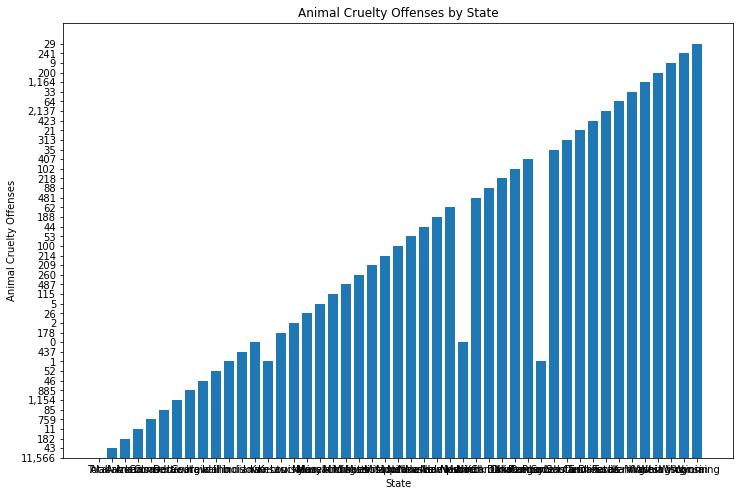

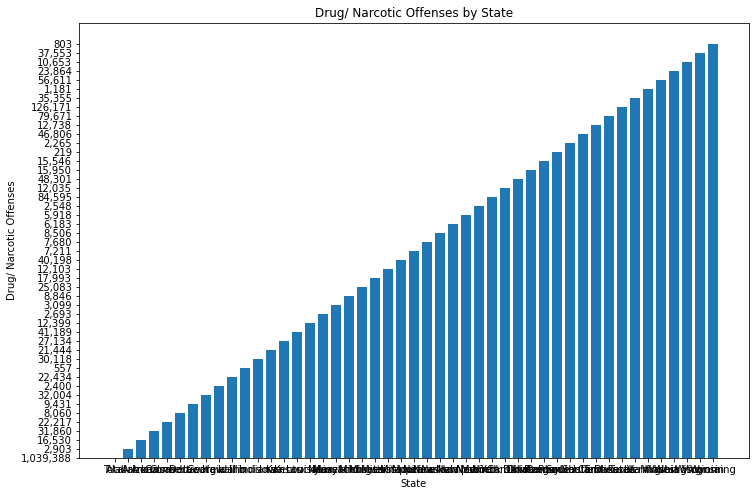

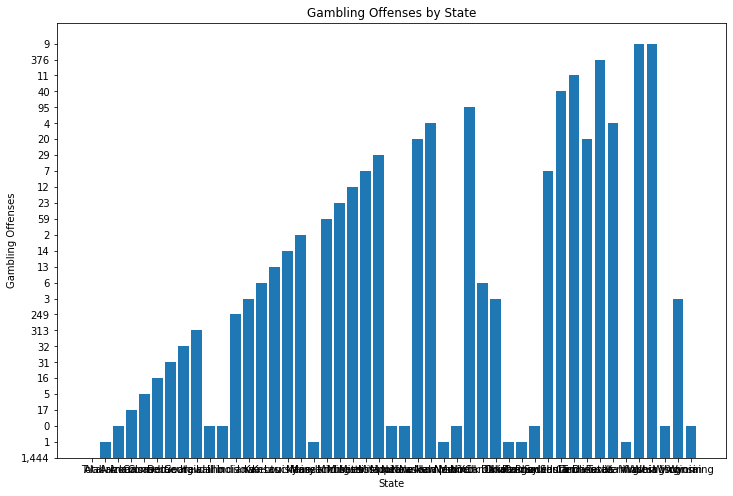

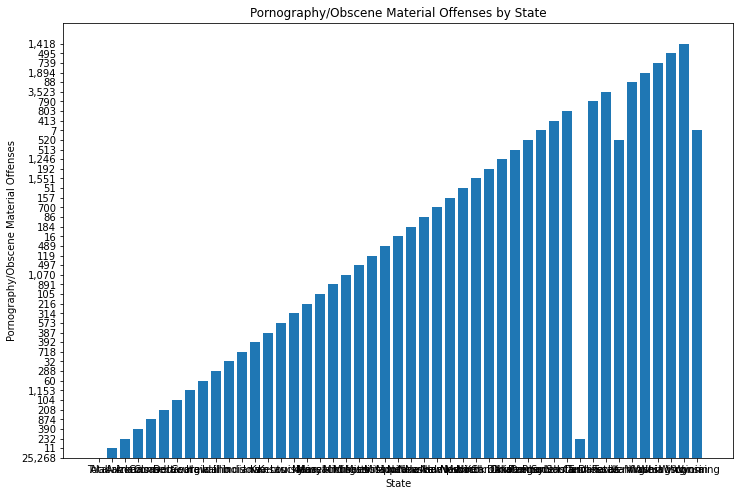

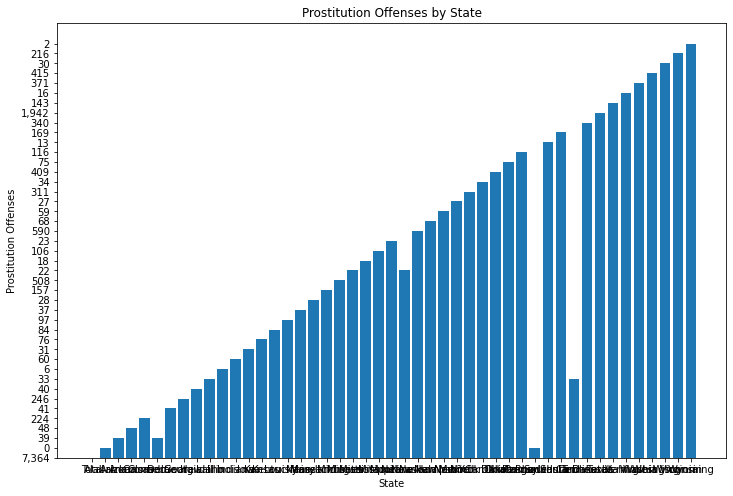

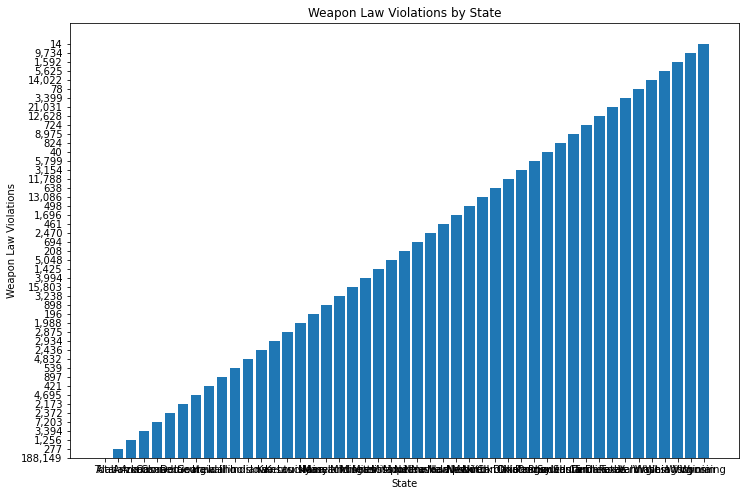

"\nplt.bar(property_data['State'], property_data['Burglary'])\nplt.title('Burglary by State')\nplt.xlabel('State')\nplt.ylabel('Burglary')\n\nplt.show()\n\nplt.bar(property_data['State'], property_data['Larceny'])\nplt.title('Larceny by State')\nplt.xlabel('State')\nplt.ylabel('Larceny')\n\nplt.show()\n\nplt.bar(property_data['State'], property_data['Motor Vehicle Theft'])\nplt.title('Motor Vehicle Theft by State')\nplt.xlabel('State')\nplt.ylabel('Motor Vehicle Theft')\n\nplt.show()\n\nplt.bar(Persons_data['State'], Persons_data['Murder and nonnegligent Manslaughter'])\nplt.title('Murder and nonnegligent Manslaughter by State')\nplt.xlabel('State')\nplt.ylabel('Murder and nonnegligent Manslaughter')\n\nplt.show()\n\nplt.bar(Persons_data['State'], Persons_data['Rape'])\nplt.title('Rape by State')\nplt.xlabel('State')\nplt.ylabel('Rape')\n\nplt.show()\n\nplt.bar(Persons_data['State'], Persons_data['Robbery'])\nplt.title('Robbery by State')\nplt.xlabel('State')\nplt.ylabel('Robbery')\n\n

In [41]:
import matplotlib.pyplot as plt

# Set figure size
plt.rcParams['figure.figsize'] = [12, 8]

# Create and display the plots
plt.bar(society_data['State'], society_data['Total Offenses'])
plt.title('Total Offenses by State')
plt.xlabel('State')
plt.ylabel('Total Offenses')

plt.show()

plt.bar(society_data['State'], society_data['Animal Cruelty'])
plt.title('Animal Cruelty Offenses by State')
plt.xlabel('State')
plt.ylabel('Animal Cruelty Offenses')

plt.show()

plt.bar(society_data['State'], society_data['Drug/ Narcotic Offenses'])
plt.title('Drug/ Narcotic Offenses by State')
plt.xlabel('State')
plt.ylabel('Drug/ Narcotic Offenses')

plt.show()

plt.bar(society_data['State'], society_data['Gambling Offenses'])
plt.title('Gambling Offenses by State')
plt.xlabel('State')
plt.ylabel('Gambling Offenses')

plt.show()

plt.bar(society_data['State'], society_data['Pornography/Obscene Material'])
plt.title('Pornography/Obscene Material Offenses by State')
plt.xlabel('State')
plt.ylabel('Pornography/Obscene Material Offenses')

plt.show()

plt.bar(society_data['State'], society_data['Prostitution Offenses'])
plt.title('Prostitution Offenses by State')
plt.xlabel('State')
plt.ylabel('Prostitution Offenses')

plt.show()

plt.bar(society_data['State'], society_data['Weapon Law Violations'])
plt.title('Weapon Law Violations by State')
plt.xlabel('State')
plt.ylabel('Weapon Law Violations')

plt.show()
"""
plt.bar(property_data['State'], property_data['Burglary'])
plt.title('Burglary by State')
plt.xlabel('State')
plt.ylabel('Burglary')

plt.show()

plt.bar(property_data['State'], property_data['Larceny'])
plt.title('Larceny by State')
plt.xlabel('State')
plt.ylabel('Larceny')

plt.show()

plt.bar(property_data['State'], property_data['Motor Vehicle Theft'])
plt.title('Motor Vehicle Theft by State')
plt.xlabel('State')
plt.ylabel('Motor Vehicle Theft')

plt.show()

plt.bar(Persons_data['State'], Persons_data['Murder and nonnegligent Manslaughter'])
plt.title('Murder and nonnegligent Manslaughter by State')
plt.xlabel('State')
plt.ylabel('Murder and nonnegligent Manslaughter')

plt.show()

plt.bar(Persons_data['State'], Persons_data['Rape'])
plt.title('Rape by State')
plt.xlabel('State')
plt.ylabel('Rape')

plt.show()

plt.bar(Persons_data['State'], Persons_data['Robbery'])
plt.title('Robbery by State')
plt.xlabel('State')
plt.ylabel('Robbery')

plt.show()

plt.bar(Persons_data['State'], Persons_data['Aggravated Assault'])
plt.title('Aggravated Assault by State')
plt.xlabel('State')
plt.ylabel('Aggravated Assault')

plt.show()
"""

# Part Four: Classification methods

First we will use logistic regression to answer one our questions "How is population size accounted for in the crime rate data? Is it adjusted for population density or demographic factors?" We will only use the first data frame(society) to answer this question

Accuracy: 0.0


ValueError: 'c' argument must be a color, a sequence of colors, or a sequence of numbers, not 0              Total
1            Alabama
2            Arizona
3           Arkansas
4           Colorado
5        Connecticut
6           Delaware
8            Georgia
9             Hawaii
10             Idaho
11          Illinois
12           Indiana
13              Iowa
14            Kansas
15          Kentucky
16         Louisiana
17             Maine
18          Maryland
19     Massachusetts
20          Michigan
21         Minnesota
22       Mississippi
23          Missouri
24           Montana
25          Nebraska
26            Nevada
27     New Hampshire
28        New Mexico
29          New York
30    North Carolina
31      North Dakota
32              Ohio
33          Oklahoma
34            Oregon
35      Pennsylvania
36      Rhode Island
37    South Carolina
38      South Dakota
39         Tennessee
40             Texas
41              Utah
42           Vermont
43          Virginia
44        Washington
45     West Virginia
46         Wisconsin
47           Wyoming
Name: State, dtype: object

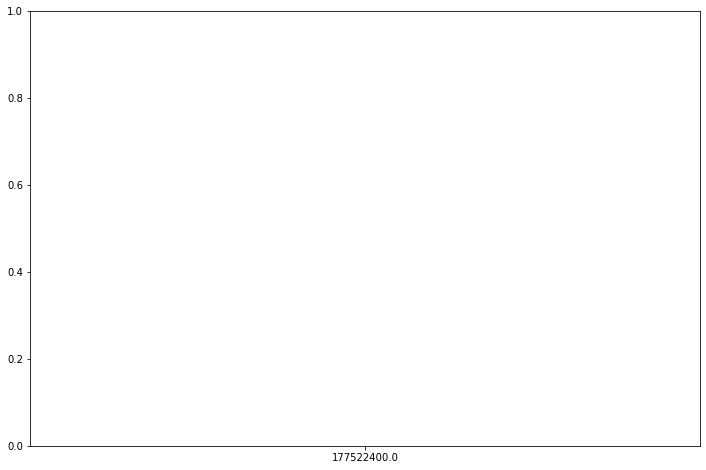

In [52]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
# Replace NaN values with -1
society_data.fillna(-1, inplace=True)


# Convert values to float
society_data['Population Covered'] = society_data['Population Covered'].astype(str).str.replace(',', '')

# Define features and target
features = society_data[['Population Covered', 'Total Offenses']]
target = society_data['State']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Scale data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define KNN classifier
knn = KNeighborsClassifier(n_neighbors=3)

# Fit model on training data
knn.fit(X_train, y_train)

# Predict on test data
y_pred = knn.predict(X_test)

# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Create scatter plot of population covered vs. total offenses
plt.scatter(features['Population Covered'], features['Total Offenses'], c=target)
plt.xlabel('Population Covered')
plt.ylabel('Total Offenses')
plt.title('Crime Data by State')
plt.show()